In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree


import seaborn as sns

## Task (Classification)

Write a function that takes as arguments the number of "halfcircles" that are being created, and how many points each arm should contain with the following signature `spiral_maker(n_arms, pts_per_arm)`. The function should return the points and the label to which arm each point belongs.

In [2]:
def spiral_maker(n_arms, pts_per_arm):
    x = np.zeros((pts_per_arm*n_arms,2)) # data matrix (each row = single example)
    y = np.zeros(pts_per_arm*n_arms) # class labels
    for i in range(n_arms):
      px = range(pts_per_arm*i,pts_per_arm*(i+1))                                     #[1] Citation
      r = np.linspace(0.0,1,pts_per_arm) # radius                                           
      theta = np.linspace(i*4,(i+1)*4,pts_per_arm) + np.random.uniform(0,1,pts_per_arm)*0.2    
      x[px] = np.c_[r*np.sin(theta), r*np.cos(theta)]
      y[px] = i
    return x,y

 Create train/test data for 300 points and 5 arms.

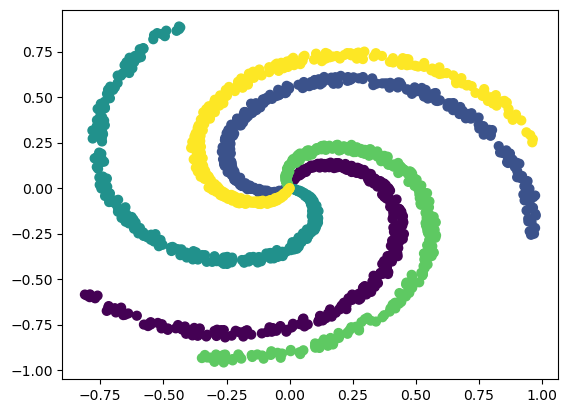

In [3]:
x, y=spiral_maker(5,300)
# lets visualize the data:
plt.scatter(x[:, 0], x[:, 1], c=y, s=40, cmap='viridis')
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=2)

What do you think are good classification algorithms for such data shapes?

Kernel SVM is preferable for nonlinear data vs. the linear models
K-nearest neighbor can also work quite well in practice for datasets with large number of samples and relatively low dimensionality
Random Forests & Extremely Randomized trees are very robust and work well across a whole range of problems – linear and/or nonlinear problems

Try out several classification algorithms. Definitely include decision trees and ensemble methods.

In [5]:
logisticreg = LogisticRegression(penalty='none', dual=False, C=1.0, fit_intercept=True,random_state= 2)

In [6]:
logisticreg.fit(x_train,y_train)
accuracy_score(y_test, logisticreg.predict(x_test))

0.2966666666666667

In [7]:
gnaiveb = GaussianNB()

In [8]:
gnaiveb.fit(x_train, y_train)
accuracy_score(y_test, gnaiveb.predict(x_test))

0.3466666666666667

In [9]:
ada_Boost= AdaBoostClassifier(learning_rate =0.2, n_estimators =1000, random_state = 2)                     

In [10]:
ada_Boost.fit(x_train, y_train)
accuracy_score(y_test, ada_Boost.predict(x_test))  

0.65

In [11]:
Decision_Tree=DecisionTreeClassifier(criterion= 'gini', max_depth=6, min_samples_split= 4,random_state=2)

In [12]:
Decision_Tree.fit(x_train,y_train)
accuracy_score(y_test, Decision_Tree.predict(x_test))

0.8066666666666666

In [13]:
gboosting_clf = GradientBoostingClassifier(learning_rate= 0.2, n_estimators=1000,criterion='squared_error', min_samples_split=2,random_state=2)

In [14]:
gboosting_clf.fit(x_train,y_train)
accuracy_score(y_test, gboosting_clf.predict(x_test))

0.9566666666666667

In [15]:
random_Forest = RandomForestClassifier(criterion= 'gini', n_estimators=1000, n_jobs=-1 ,random_state=2)

In [16]:
random_Forest.fit(x_train, y_train)
accuracy_score(y_test, random_Forest.predict(x_test))

0.9766666666666667

In [17]:
rbf_svc = svm.SVC(kernel='rbf', C=1, random_state=2)

In [18]:
rbf_svc.fit(x_train, y_train)
accuracy_score(y_test, rbf_svc.predict(x_test))

0.9566666666666667

In [19]:
kneighb = KNeighborsClassifier(n_neighbors=3)

In [20]:
kneighb.fit(x_train, y_train)
accuracy_score(y_test, kneighb.predict(x_test))

C:\Users\admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9933333333333333

Compare the results of the different classifiers.

- The accuracies of all 8 classifiers were studied. By comparision, we get to know that the accuracy of logistic regression is least 
- Naive Bayes may work better than logistic regression for small training set sizes.
- K-nearest neighbour gives best accuracy for our non- linear data.
- SVM with RBF kernel gives almost same accuracy as random forest classifier

Do you know/understand why some classifiers are better suited for this type of data?

- Logistic regression uses linear decision boundaries and it is for linear data. Our data is non-linear 
- Naive Bayes may work better than logistic regression for small training set sizes.
- A classifier is linear if its decision boundary on the feature space is a linear function: positive and negative examples are separated by an hyperplane. This is what a SVM does by definition without the use of the kernel trick
- With kNN you don't have an hyperplane in general. Imagine some dense region of positive points. The decision boundary to classify test instances around those points will look like a curve - not a hyperplane.                      ...  [2]Citation

# Conclusion

- We created spiral data to form data with  strong non-linearities and overlaps. We used several classifiers of Non-linear classifier, Ensemble classifier and Non-parametric classifiers. The accuracies of classifiers are in the given order(highest to lowest): KNN >Random Forest > Gradient Boost=SVM >Decision Tree > AdaBoost > Naive Bayes > Logistic Regression.
- Our data is non-linear so logistic regression didn't give good accuracy.
- KNN and other non-linear classifiers were better.

# References

1.https://cs231n.github.io/neural-networks-case-study/

2.https://stats.stackexchange.com/questions/178522/why-knn-is-a-non-linear-classifier